# Деревья решений

Дерево принятия решений — средство поддержки принятия решений, использующееся в машинном обучении, анализе данных и статистике. Структура дерева представляет собой «листья» и «ветки». На рёбрах («ветках») дерева решения записаны признаки, от которых зависит целевая функция, в «листьях» записаны значения целевой функции, а в остальных узлах — признаки, по которым различаются случаи. Чтобы классифицировать новый случай, надо спуститься по дереву до листа и выдать соответствующее значение.

Каждый лист представляет собой значение целевой переменной, изменённой в ходе движения от корня по рёбрам дерева до листа. Каждый внутренний узел сопоставляется с одной из входных переменных.

Дерево может быть также «изучено» разделением исходных наборов переменных на подмножества, основанные на проверке значений признаков. Это действие повторяется на каждом из полученных подмножеств. Рекурсия завершается тогда, когда подмножество в узле имеет те же значения целевой переменной, таким образом, оно не добавляет ценности для предсказаний.

Целевые функции - энтропия $-\sum_{i=1}^m p_i\log_2p_i$ или критерий Джини: $1 - \sum_{i-1}^m p_i^2$.

Обучение выполняется перебором выборов по одному из критериев с пошаговой минимизацией критерия. Задача регрессии решается аналогично п осреднему значению критерия.

## Задача классификации

Подготовим датасет из данных по отказам квадрокоптера

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [5]:
data=pd.read_csv("FDIR_dataset_training.csv")
data.drop(['status_fault_voltage', 'status_fault_L' , 'status_fault_R', 'status_fault_km', 'status_fault_J', 'status_fault_ke', 'status_fault_kf', 'status_fault_w'], axis=1, inplace = True)
X = data.drop('status_fault_force', axis = 1)
y = data['status_fault_force']
X.shape, y.shape

((95131, 7), (95131,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
tree_1  = DecisionTreeClassifier()

Обучим модель на обучающих данных

In [8]:
tree_1.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
from sklearn.metrics import accuracy_score

y_predict = tree_1.predict(X_train)
accuracy_score(y_train, y_predict)

0.9998554609481762

На тестовых данных

In [10]:
y_predict = tree_1.predict(X_test)
accuracy_score(y_test, y_predict)

0.9867556630052031

##  Оптимизация параметров

In [11]:
from sklearn.model_selection import GridSearchCV

tree_params = {'max_depth': np.arange(1,11), 'max_features':(0.5, 0.7, 1)}

grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
grid_tree.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features=0.5)

In [12]:
y_predict = grid_tree.predict(X_test)
accuracy_score(y_test, y_predict)

0.9754559310453566

[Text(237.53111901197605, 207.55636363636364, 'X[1] <= 24.209\ngini = 0.081\nsamples = 76104\nvalue = [72899, 3205]'),
 Text(159.89247754491018, 187.7890909090909, 'X[3] <= 0.5\ngini = 0.076\nsamples = 75508\nvalue = [72514, 2994]'),
 Text(102.07724550898203, 168.0218181818182, 'X[4] <= 1.938\ngini = 0.094\nsamples = 39445\nvalue = [37499, 1946]'),
 Text(49.702095808383234, 148.25454545454545, 'X[2] <= -9.882\ngini = 0.088\nsamples = 38694\nvalue = [36906, 1788]'),
 Text(23.05508982035928, 128.48727272727274, 'X[1] <= -21.504\ngini = 0.415\nsamples = 323\nvalue = [228, 95]'),
 Text(14.701796407185629, 108.72, 'X[3] <= -2.5\ngini = 0.499\nsamples = 192\nvalue = [100, 92]'),
 Text(6.01437125748503, 88.95272727272729, 'X[6] <= -9.6\ngini = 0.408\nsamples = 84\nvalue = [24, 60]'),
 Text(4.677844311377245, 69.18545454545455, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(7.3508982035928145, 69.18545454545455, 'X[2] <= -10.728\ngini = 0.454\nsamples = 69\nvalue = [24, 45]'),
 Text(4.009

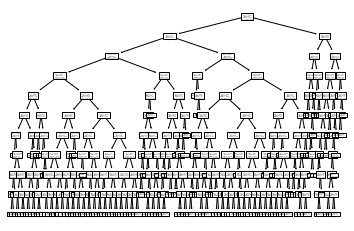

In [16]:
from sklearn.tree import plot_tree

tree = DecisionTreeClassifier(max_depth=10, max_features=0.5)
tree.fit(X_train, y_train)
plot_tree(tree)

## Регрессия

На случайном датасете

In [17]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [18]:
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [21]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_test = y = np.sin(X_test).ravel()
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_1), mean_squared_error(y_test, y_2)

(0.054576064173904, 0.14463159373446569)

## Случайный лес

Генерируются деревья, каждое из которых обучается на разных кусочках датасета. При классификации и регрессии считается голос каждого дерева

In [25]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:, 3:] # ширина лепестка
y = (iris['target'] == 2).astype(np.int) # 1, если ирис виргинский, иначе О

X_train, X_test, y_train,  y_test = train_test_split(X, y,test_size=0.2)

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

y_predict = rf_clf.predict(X_test)
accuracy_score(y_test, y_predict)

1.0

## Настройка параметров леса

In [27]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [28]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
cv_rf = RandomizedSearchCV(rf, random_grid, n_iter=100, cv=3)
cv_rf.fit(X_train, y_train)
cv_rf.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=80, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=200)